<a href="https://colab.research.google.com/github/Michelleagl/Series_de_Tiempo/blob/main/proyecto_ipc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Proyecto 2 Series de tiempo**

Michelle Gómez

Paula Pelayo

Rogelio Campos

<br>
<br>

![iteso](https://upload.wikimedia.org/wikipedia/en/5/5f/Western_Institute_of_Technology_and_Higher_Education_logo.png)





### **ÍNDICE**

- Introducción
- Teoría Modelo (Neural network autoregression)
- Descarga de datos
- Aplicación de transformación matemática
- Ajuste de modelo
- Validación y análisis de resultados
- Elección de modelo para cada acción, según métrica de error
- Pronósticos a 3 meses / cada industria y portafolio total
- Cierre y conclusiones



## **Introducción**

IPC

El **Índice de Precios y Cotizaciones (IPC)** es el principal indicador bursátil de México, elaborado por la Bolsa Mexicana de Valores (BMV). Mide el rendimiento promedio de una muestra de las acciones más negociadas y de mayor capitalización en el mercado, lo que lo convierte en un barómetro del desempeño del mercado financiero y, en cierta medida, de la economía mexicana.

El IPC es relevante porque sirve como referencia para evaluar la rentabilidad de las inversiones en el mercado accionario, guía a los inversionistas en la toma de decisiones y se utiliza como base para productos financieros como ETFs. También es un indicador de confianza para el mercado, ya que refleja las expectativas de los inversionistas nacionales e internacionales.

Aunque es una herramienta clave, el IPC tiene limitaciones, como su vulnerabilidad a la volatilidad del mercado y la concentración en un pequeño número de empresas que pueden tener un peso significativo en el índice. Aun así, sigue siendo fundamental para analizar y comprender el comportamiento del mercado bursátil en México.

## **Teoría del Modelo**

**Redes Neuronales Autoregresivas (NNAR)**

Las Redes Neuronales Autoregresivas (NNAR) combinan los principios de las redes neuronales artificiales con las técnicas autoregresivas tradicionales para modelar y predecir series de tiempo. Son redes útiles para datos temporales complejos, como precios de activos financieros, tasas de interés o indicadores económicos, donde las relaciones no lineales y los patrones estacionales son comunes.

___

**¿Qué es una NNAR?**

Es una red neuronal de tipo feed-forward diseñada con el propósito de trabajar con series de tiempo. En lugar de utilizar predictores externos, utiliza valores pasados de la propia serie (rezagos) para predecir valores futuros.

**Estructura de una NNAR**
  1.	Capa de entrada: Los valores rezagados de la serie {yt−1, yt−2,…, yt−p }, se utilizan como predictores. Por ejemplo, en un modelo NNAR(5,3), se toman los últimos 5 valores de la serie.

  2.	Capa oculta: Esta capa contiene "neuronas" que combinan las entradas mediante pesos asignados a cada predictor. Las combinaciones pasan por una función de activación (como la función sigmoide) que introduce no linealidad en el modelo. Esto permite a la red identificar patrones complejos en los datos.

  3.	Capa de salida: La capa de salida genera el valor predicho de la serie para el próximo período (yt).

  ___

**¿Cómo funciona?**

-*Entrenamiento:*
○	La red ajusta los pesos asignados a cada predictor minimizando una función de pérdida, como el error cuadrático medio (MSE).
○	Este proceso utiliza técnicas como el descenso de gradiente.


-*Predicción:*
○	Una vez entrenada, la red utiliza los valores pasados de la serie para predecir valores futuros.
○	Si se requiere una predicción de varios pasos, las predicciones se alimentan de vuelta como entradas en un proceso iterativo.


**Aplicaciones en ingeniería financiera**
En ingeniería financiera, las NNAR son útiles para:
-	Predecir precios de activos financieros, como acciones o criptomonedas.
-	Modelar tasas de interés o inflación.
-	Estimar la volatilidad de mercados.
Un ejemplo práctico sería utilizar un modelo NNAR para predecir el precio futuro de una acción basándose en los últimos valores de cierre.
___
**Ventajas y limitaciones**

*Ventajas:*
-	Capacidad para modelar patrones no lineales.
-	Incorporación de estacionalidad sin necesidad de transformaciones complejas.
-	Flexibilidad para manejar datos complejos.

*Limitaciones:*
- Requiere ajustar cuidadosamente los hiperparámetros (ppp, kkk, PPP).
-	Mayor costo computacional en comparación con métodos lineales.
-	Dependencia de un buen preprocesamiento de datos y series históricas completas.
___
Las **NNAR** representan una herramienta avanzada y versátil para analizar y predecir series de tiempo en problemas financieros. Su capacidad para capturar patrones no lineales las hace especialmente valiosas en mercados donde las relaciones entre variables son complejas y dinámicas. Con el uso de bibliotecas como TensorFlow, Keras o PyTorch, los alumnos pueden implementar estos modelos para resolver problemas reales de predicción financiera




## **Descarga de Datos**


In [1]:
import pandas as pd
import yfinance as yf

In [2]:
ticker = yf.Tickers(["AMXB.MX",
                     "WALMEX.MX",
                     "FEMSAUBD.MX",
                     "GMEXICOB.MX",
                     "GFNORTEO.MX",
                     "BIMBOA.MX",
                     "TLEVISACPO.MX",
                     "KIMBERA.MX",
                     "CEMEXCPO.MX",
                     "CHDRAUIB.MX",
                     "MEGACPO.MX",
                     "LABB.MX",
                     "CUERVO.MX",
                     "GRUMAB.MX",
                     "ALSEA.MX",
                     "GFINBURO.MX",
                     "OMAB.MX",
                     "ASURB.MX",
                     "AC.MX",
                     "GCARSOA1.MX",
                     "BBAJIOO.MX",
                     "GAPB.MX",
                     "BOLSAA.MX",
                     "PINFRA.MX",
                     "ALFAA.MX",
                     "LIVEPOLC-1.MX",
                     "PE&OLES.MX",
                     "KOF.MX",
                     "VESTA.MX",
                     "GCC.MX",
                     "ORBIA.MX",
                     "Q.MX",
                     "R.A.MX"])


data = ticker.history(start= '2015-01-01', end= '2023-12-31', interval='1mo')['Close']


[*********************100%***********************]  33 of 33 completed
ERROR:yfinance:
2 Failed downloads:
ERROR:yfinance:['R.A.MX', 'KOF.MX']: YFTzMissingError('$%ticker%: possibly delisted; no timezone found')


In [3]:
data.index = data.index.strftime('%Y-%m')
data.index = pd.to_datetime(data.index)

In [4]:
data.head()

Ticker,AC.MX,ALFAA.MX,ALSEA.MX,AMXB.MX,ASURB.MX,BBAJIOO.MX,BIMBOA.MX,BOLSAA.MX,CEMEXCPO.MX,CHDRAUIB.MX,...,MEGACPO.MX,OMAB.MX,ORBIA.MX,PE&OLES.MX,PINFRA.MX,Q.MX,R.A.MX,TLEVISACPO.MX,VESTA.MX,WALMEX.MX
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,65.702614,24.680984,37.795330,11.671398,154.705292,NaN,34.200207,15.430022,11.531771,37.656040,...,38.958519,38.346149,32.977501,262.346039,130.751785,NaN,NaN,88.730591,23.547869,22.713276
2015-02-01,70.285484,29.101454,43.193314,11.671398,161.849304,NaN,37.858757,16.780144,13.125944,44.382282,...,39.022575,39.573219,34.580372,281.710815,138.726181,NaN,NaN,92.414070,23.328474,28.707388
2015-03-01,69.477180,27.672890,42.006325,11.124299,162.236099,NaN,38.791317,16.133083,12.536794,41.835011,...,42.517677,41.436153,31.706266,235.338333,126.094299,NaN,NaN,91.677376,23.035959,30.010487
2015-04-01,69.892448,27.987354,43.400566,11.737049,171.416763,NaN,36.944118,18.360479,13.335612,41.735294,...,45.450413,42.735741,34.969208,230.718765,136.695755,NaN,NaN,101.554520,23.328474,28.537912
2015-05-01,70.519691,27.213701,43.626663,11.744344,179.291840,NaN,37.374535,16.991692,12.993212,42.756989,...,46.048355,40.197926,37.133888,242.054337,130.000076,NaN,NaN,105.901924,22.910898,30.458601


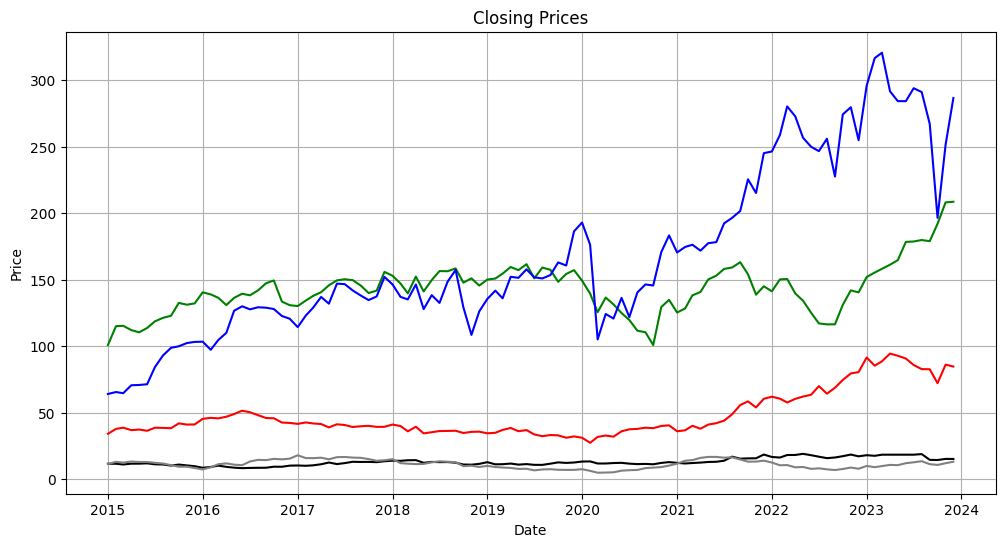

In [5]:
# plot of data

import matplotlib.pyplot as plt

# plot the closing price of 5 random
plt.figure(figsize=(12, 6))
plt.plot(data['AMXB.MX'],label='AMXB.MX', color='black')
plt.plot(data['CEMEXCPO.MX'],label='CEMEXCPO.MX', color='gray')
plt.plot(data['BIMBOA.MX'],label='BIMBOA.MX', color='red')
plt.plot(data['FEMSAUBD.MX'],label='FEMSAUBD.MX', color='green')
plt.plot(data['GAPB.MX'],label='GAPB.MX', color='blue')
plt.title('Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)
plt.show()


## **Aplicación de transformación matemática**

## **Elección de modelo para cada acción, según métrica de error**


## **Pronósticos a 3 meses**

## **Conclusiones**

## **Referencias**

Gbm. (2023, 10 abril). ¿Qué es el Índice de Precios y Cotizaciones (IPC) de México? GBM Academy. https://gbm.com/academy/que-es-el-indice-de-precios-y-cotizaciones-ipc/

